<a href="https://colab.research.google.com/github/fjadidi2001/DecompDenoise/blob/main/DD_Feb11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
from skimage.util import random_noise
from skimage.transform import rescale

# --------------------------
# 1. Synthetic Data Generation
# --------------------------

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    noisy = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return np.clip(noisy, 0, 255)

def add_salt_pepper_noise(image, prob=0.05):
    """Add salt-and-pepper noise to an image."""
    return (random_noise(image, mode='s&p', amount=prob) * 255).astype(np.uint8)

def add_poisson_noise(image):
    """Add Poisson noise to an image."""
    return (random_noise(image, mode='poisson') * 255).astype(np.uint8)

# --------------------------
# 2. Anscombe Transform (Variance Stabilization)
# --------------------------

def anscombe_transform(image):
    """Apply Anscombe transform to stabilize noise variance."""
    return 2 * np.sqrt(image + 3/8).astype(np.float32)

def inverse_anscombe_transform(transformed_image):
    """Approximate inverse Anscombe transform."""
    return (transformed_image / 2)**2 - 3/8

# --------------------------
# 3. Gabor Filter (Multi-scale Feature Extraction)
# --------------------------

def apply_gabor_filter(image, frequency=0.6, theta=0, sigma=1.5):
    """Apply Gabor filter to extract multi-scale features."""
    kernel = cv2.getGaborKernel(
        ksize=(21, 21),
        sigma=sigma,
        theta=theta,
        lambd=1/frequency,
        gamma=0.5,
        psi=0,
        ktype=cv2.CV_32F
    )
    filtered = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    return filtered

# --------------------------
# 4. Preprocessing Pipeline
# --------------------------

def preprocess_image(image_path, target_size=(256, 256)):
    """Full preprocessing pipeline: load, resize, denoise, and filter."""
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    # Resize to target size
    image = cv2.resize(image, target_size)

    # Convert to grayscale (optional)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply synthetic noise (example: Gaussian)
    noisy_image = add_gaussian_noise(image)

    # Anscombe transform
    anscombe_img = anscombe_transform(noisy_image)

    # Gabor filtering (example: horizontal orientation)
    gabor_filtered = apply_gabor_filter(noisy_image, theta=np.pi/4)

    return {
        "original": image,
        "noisy": noisy_image,
        "anscombe": anscombe_img,
        "gabor_filtered": gabor_filtered
    }

# --------------------------
# Example Usage
# --------------------------

if __name__ == "__main__":
    # Example: Process a sample image
    image_path = "Mona_Lisa.jpg"  # Replace with your image path

    # Run preprocessing
    results = preprocess_image(image_path)

    # Save results (optional)
    output_dir = "preprocessed_results"
    os.makedirs(output_dir, exist_ok=True)

    for key, img in results.items():
        cv2.imwrite(f"{output_dir}/{key}.jpg", img)

    print("Preprocessing completed. Results saved to:", output_dir)

Preprocessing completed. Results saved to: preprocessed_results


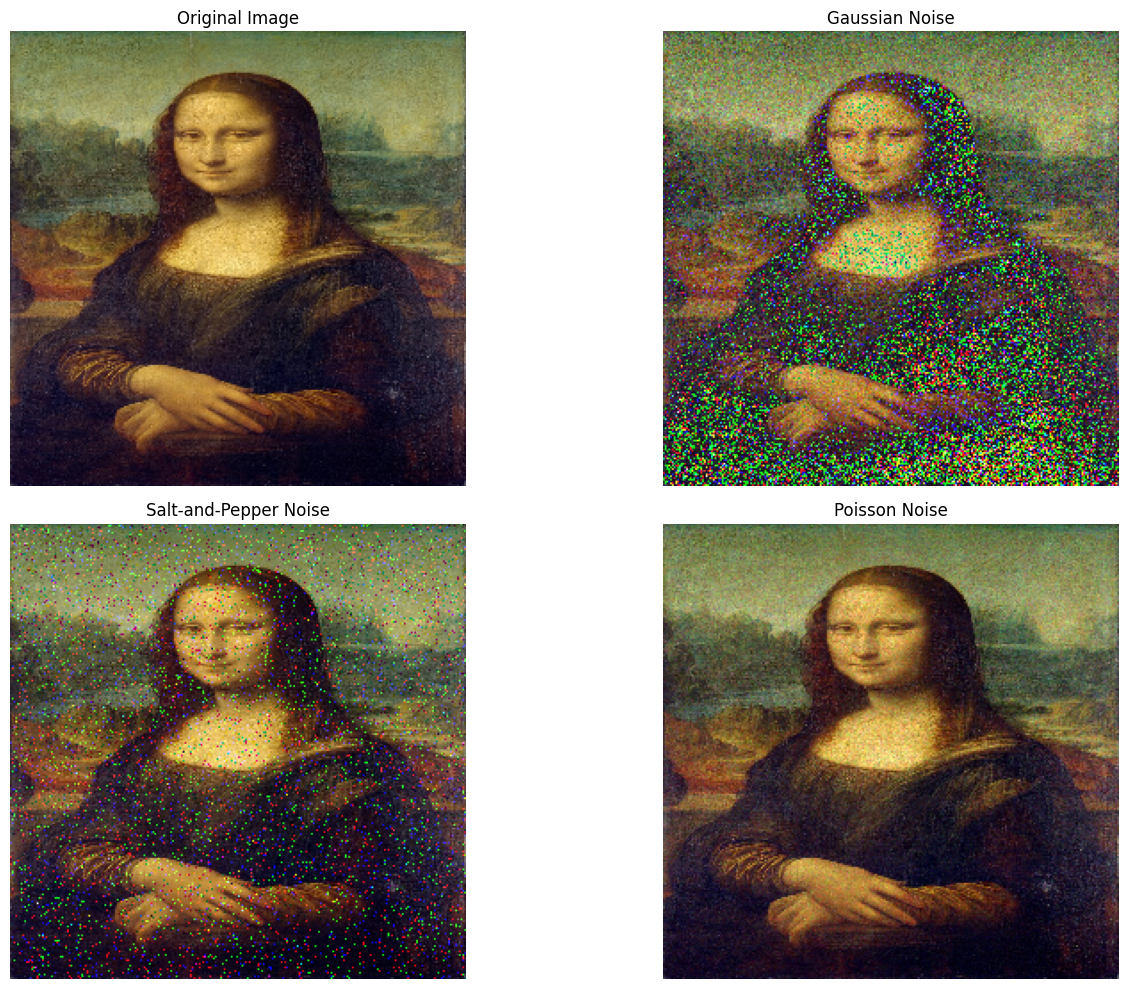

In [3]:
import os
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt

# --------------------------
# 1. Synthetic Data Generation
# --------------------------

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    noisy = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return np.clip(noisy, 0, 255)

def add_salt_pepper_noise(image, prob=0.05):
    """Add salt-and-pepper noise to an image."""
    return (random_noise(image, mode='s&p', amount=prob) * 255).astype(np.uint8)

def add_poisson_noise(image):
    """Add Poisson noise to an image."""
    return (random_noise(image, mode='poisson') * 255).astype(np.uint8)

# --------------------------
# 2. Preprocessing Pipeline
# --------------------------

def preprocess_image(image_path, target_size=(256, 256)):
    """Full preprocessing pipeline: load, resize, and add noise."""
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    # Resize to target size
    image = cv2.resize(image, target_size)

    # Convert to grayscale (optional)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply synthetic noise (example: Gaussian, Salt-and-Pepper, Poisson)
    noisy_gaussian = add_gaussian_noise(image)
    noisy_salt_pepper = add_salt_pepper_noise(image)
    noisy_poisson = add_poisson_noise(image)

    return {
        "original": image,
        "noisy_gaussian": noisy_gaussian,
        "noisy_salt_pepper": noisy_salt_pepper,
        "noisy_poisson": noisy_poisson
    }

# --------------------------
# 3. Visualization Function
# --------------------------

def display_images(images_dict):
    """Display the original and noisy images with titles."""
    plt.figure(figsize=(15, 10))

    # Plot original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(images_dict["original"], cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Plot noisy images
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(images_dict["noisy_gaussian"], cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Noise")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(images_dict["noisy_salt_pepper"], cv2.COLOR_BGR2RGB))
    plt.title("Salt-and-Pepper Noise")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(images_dict["noisy_poisson"], cv2.COLOR_BGR2RGB))
    plt.title("Poisson Noise")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# --------------------------
# Example Usage
# --------------------------

if __name__ == "__main__":
    # Path to your dataset (Mona_Lisa.jpg)
    image_path = "Mona_Lisa.jpg"  # Replace with the correct path if needed

    # Run preprocessing
    results = preprocess_image(image_path)

    # Display images
    display_images(results)

# preprocessing techniques

In [4]:
import numpy as np
import cv2
from scipy import special
from scipy import ndimage

def anscombe_transform(image):
    """
    Apply Anscombe transform to stabilize variance in Poisson noise.

    Args:
        image (numpy.ndarray): Input image

    Returns:
        numpy.ndarray: Transformed image
    """
    # Convert image to float
    float_image = image.astype(float)

    # Apply Anscombe transform
    # Formula: 2 * sqrt(x + 3/8)
    return 2.0 * np.sqrt(float_image + 3.0/8.0)

def inverse_anscombe_transform(image):
    """
    Apply inverse Anscombe transform.

    Args:
        image (numpy.ndarray): Transformed image

    Returns:
        numpy.ndarray: Original scale image
    """
    # Formula: (x/2)^2 - 3/8
    return ((image/2.0)**2 - 3.0/8.0)

def create_gabor_filters(num_filters=8):
    """
    Create a bank of Gabor filters at different scales and orientations.

    Args:
        num_filters (int): Number of filters to create (different orientations)

    Returns:
        list: List of generated Gabor kernels
    """
    filters = []
    ksize = 31  # Kernel size
    sigma = 3.0  # Standard deviation
    lambda_min = 4.0  # Minimum wavelength

    for theta in np.arange(0, np.pi, np.pi/num_filters):  # Different orientations
        for lambda_val in [lambda_min, lambda_min*2]:  # Different scales
            kernel = cv2.getGaborKernel(
                (ksize, ksize),
                sigma=sigma,
                theta=theta,
                lambd=lambda_val,
                gamma=0.5,
                psi=0,
                ktype=cv2.CV_32F
            )
            kernel /= 1.5 * kernel.sum()
            filters.append(kernel)

    return filters

def apply_gabor_filters(image, kernels):
    """
    Apply bank of Gabor filters to image and combine responses.

    Args:
        image (numpy.ndarray): Input image
        kernels (list): List of Gabor kernels

    Returns:
        numpy.ndarray: Combined filter response
    """
    # Initialize accumulator for filter responses
    responses = []

    # Convert image to float32 for filtering
    image = image.astype(np.float32)

    # Apply each filter
    for kernel in kernels:
        # Apply filter to each channel separately if image is color
        if len(image.shape) == 3:
            filtered = np.zeros_like(image)
            for i in range(3):
                filtered[:,:,i] = cv2.filter2D(image[:,:,i], cv2.CV_32F, kernel)
        else:
            filtered = cv2.filter2D(image, cv2.CV_32F, kernel)

        responses.append(filtered)

    # Combine responses (maximum response at each pixel)
    combined = np.maximum.reduce(responses)

    return combined

def enhanced_preprocess_image(image_path, target_size=(256, 256)):
    """
    Enhanced preprocessing pipeline with variance stabilization and feature extraction.

    Args:
        image_path (str): Path to input image
        target_size (tuple): Target size for resizing

    Returns:
        dict: Dictionary containing original, noisy, and processed images
    """
    # Load and resize image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    image = cv2.resize(image, target_size)

    # Generate noisy versions
    noisy_gaussian = add_gaussian_noise(image)
    noisy_salt_pepper = add_salt_pepper_noise(image)
    noisy_poisson = add_poisson_noise(image)

    # Apply Anscombe transform to stabilize variance
    stabilized_gaussian = anscombe_transform(noisy_gaussian)
    stabilized_poisson = anscombe_transform(noisy_poisson)

    # Create and apply Gabor filters
    gabor_kernels = create_gabor_filters()
    gabor_response_original = apply_gabor_filters(image, gabor_kernels)
    gabor_response_gaussian = apply_gabor_filters(stabilized_gaussian, gabor_kernels)
    gabor_response_poisson = apply_gabor_filters(stabilized_poisson, gabor_kernels)

    return {
        "original": image,
        "noisy_gaussian": noisy_gaussian,
        "noisy_salt_pepper": noisy_salt_pepper,
        "noisy_poisson": noisy_poisson,
        "stabilized_gaussian": stabilized_gaussian,
        "stabilized_poisson": stabilized_poisson,
        "gabor_original": gabor_response_original,
        "gabor_gaussian": gabor_response_gaussian,
        "gabor_poisson": gabor_response_poisson
    }

def display_preprocessing_results(results):
    """
    Display original, noisy, and processed images.

    Args:
        results (dict): Dictionary containing images from preprocessing pipeline
    """
    plt.figure(figsize=(15, 15))

    # Original and noisy images
    titles = [
        "Original", "Gaussian Noise", "Salt-Pepper Noise", "Poisson Noise",
        "Stabilized Gaussian", "Stabilized Poisson",
        "Gabor Original", "Gabor Gaussian", "Gabor Poisson"
    ]

    images = [
        results["original"], results["noisy_gaussian"],
        results["noisy_salt_pepper"], results["noisy_poisson"],
        results["stabilized_gaussian"], results["stabilized_poisson"],
        results["gabor_original"], results["gabor_gaussian"],
        results["gabor_poisson"]
    ]

    for idx, (title, img) in enumerate(zip(titles, images)):
        plt.subplot(3, 3, idx + 1)
        # Convert BGR to RGB for display if image is color
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


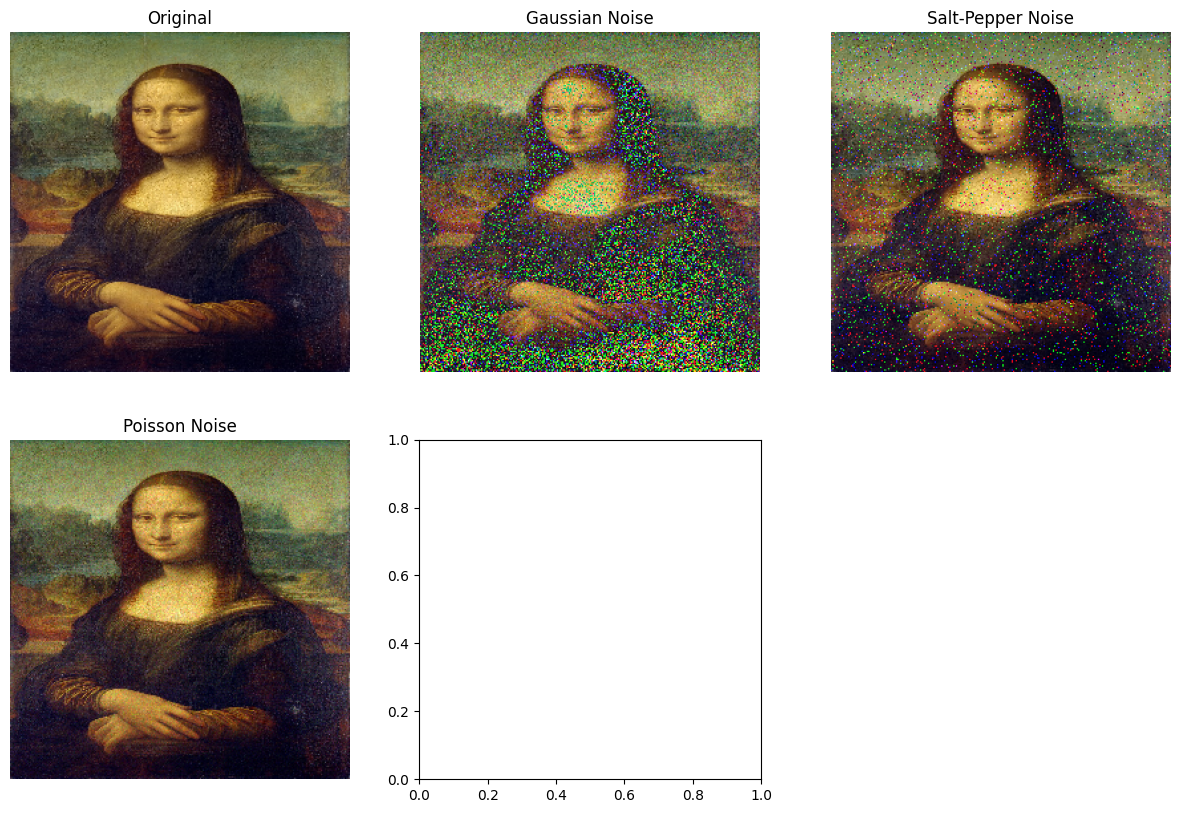

In [5]:
if __name__ == "__main__":
    image_path = "Mona_Lisa.jpg"
    results = enhanced_preprocess_image(image_path)
    display_preprocessing_results(results)